# Capstone Business Problem:
Figuring out what game would benefit the most from being remastered and re released. So which games had high criritc scores and sold well previously.What games should be re released for the public.
* Stakeholder: Not sure yet. Maybe Microsofft, Sony, Nintendo. Bluepoint 

binary flag of sequel, popularity features based off of what region had the most sales, combine genres, imputation needed because tons of missing values -- MUST DO Feature Engineering

Decision Tree Classifier bin the target variable logistic regression naive bayes classifier

# Data Preparaton

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, make_scorer, recall_score, plot_roc_curve, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from statsmodels.api import qqplot
from scipy import stats
from sklearn.metrics import precision_score

In [2]:
# loading in and exploring dataset
# Read in csv file and preview DataFrame
df = pd.read_csv('Video_Games.csv')
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


- Global Sales is a total of NA, EU and Jp Sales

- Can see there are alot of missing values. Especially in User Score and User count. Critic Score and Critic count.

- Missing Values in Developer & Ratings .
 
- Rating  and Developer can be dropped. No relevance to business problem. Alot of null values.

In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Distribution')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


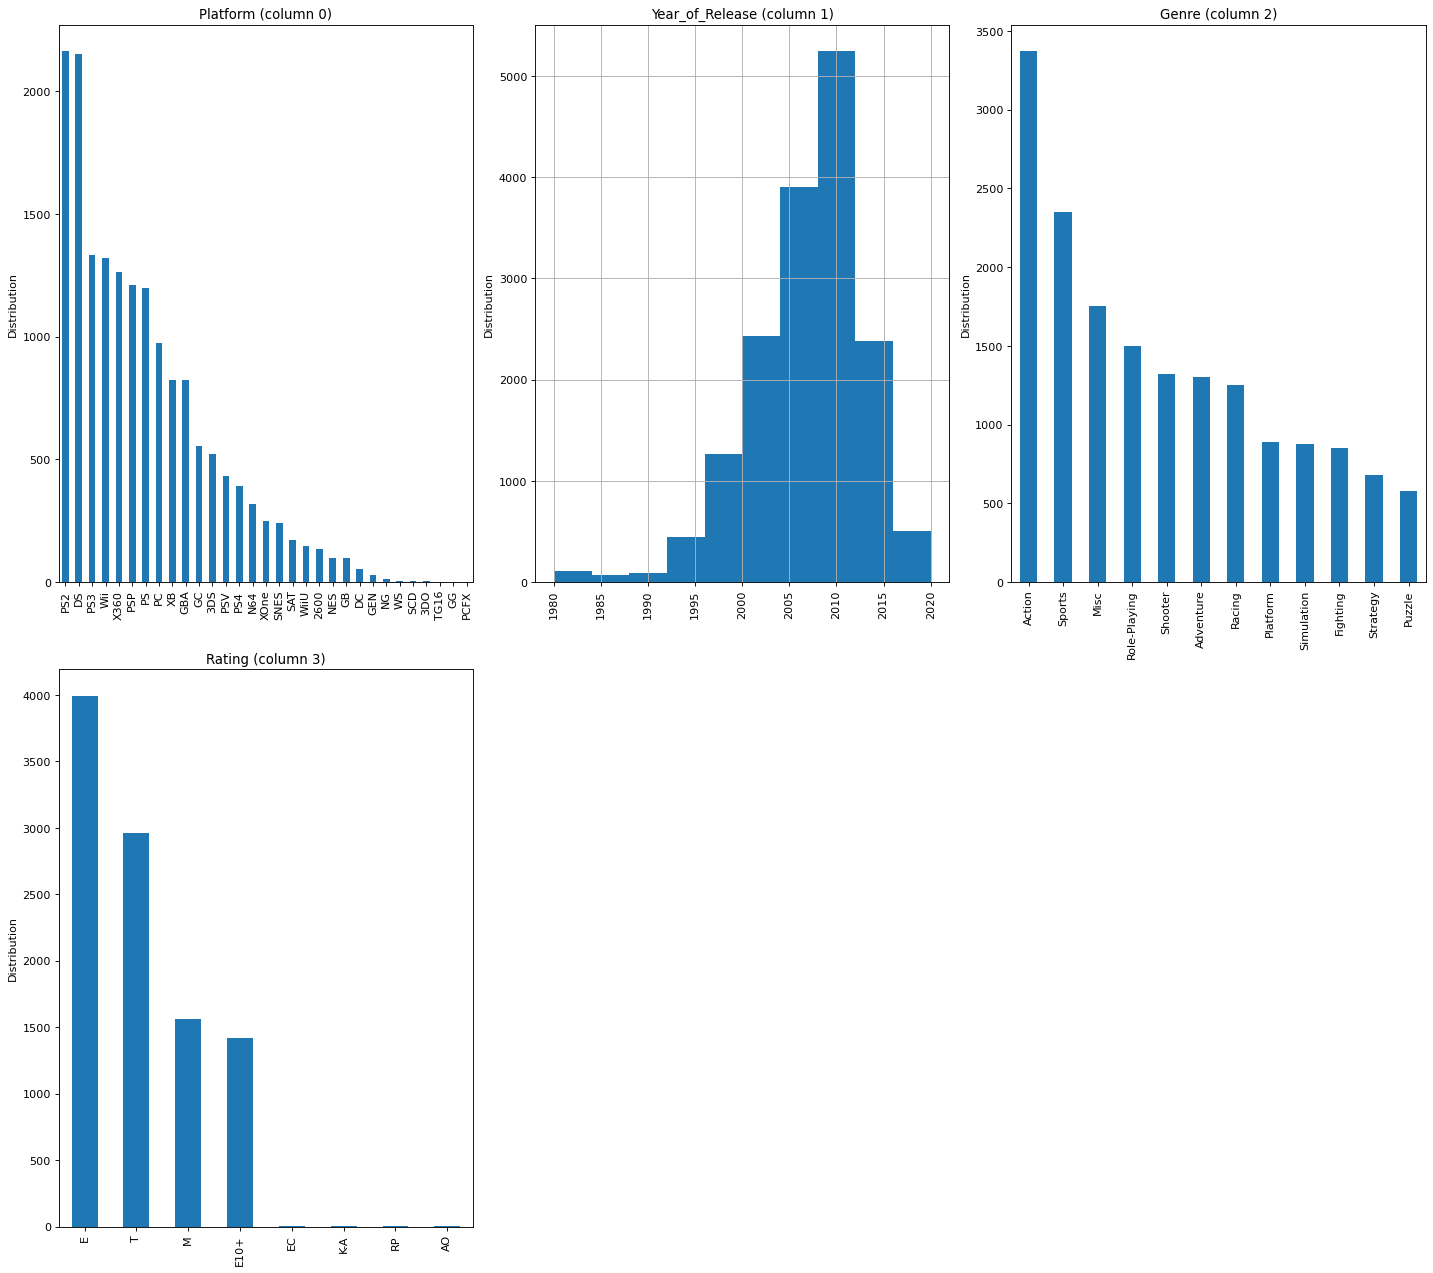

In [5]:
plotPerColumnDistribution(df, 25, 3)

In [6]:
df['Developer'].value_counts()

Ubisoft                              204
EA Sports                            172
EA Canada                            167
Konami                               162
Capcom                               139
                                    ... 
Left Field Productions, Zoo Games      1
Enterbrain                             1
Next Wave Team                         1
Liquid Dragon Studios                  1
Red Zone Entertainment                 1
Name: Developer, Length: 1696, dtype: int64

In [7]:
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

In [8]:
systems = df['Platform'].unique()
print(sorted(systems))
# 31 different game systems 

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


In [9]:
print(df['Year_of_Release'].min())
print(df['Year_of_Release'].max())

1980.0
2020.0


-Dataset contains new gen console and Xbox One(XOne). 
we want to look at games from previous generations to re- release since new gen is still fresh.
- Xbox One release in 2013. So cutoff will be 2013

In [10]:
print(df['Critic_Score'].min())
print(df['Critic_Score'].max())

13.0
98.0


# Data Cleaning 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [12]:
df.drop(df[df.Year_of_Release.isnull()].index, inplace = True) #remove null value in Year of release column
df.drop(df[df.Name.isnull()].index, inplace = True) #remove null value in Name column
df.drop(df[df.Publisher.isnull()].index, inplace = True) #remove null value in Publisher column

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       9837 non-null   object 
 13  User_Count       7461 non-null   float64
 14  Developer        9904 non-null   object 
 15  Rating           9767 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.1+ MB


Dropping null values and dropping ;ratinf' column due to its non relevance in the business problem

In [14]:
df = df.drop('Rating', 1)

In [15]:
df = df.drop('Developer', 1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       9837 non-null   object 
 13  User_Count       7461 non-null   float64
dtypes: float64(9), object(5)
memory usage: 1.9+ MB


Converting user_score fron an object to an integer so that it can be filled with the median

In [17]:
#convert User_score from object to integer
df.User_Score = pd.to_numeric(df.User_Score, errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       7461 non-null   float64
 13  User_Count       7461 non-null   float64
dtypes: float64(10), object(4)
memory usage: 1.9+ MB


In [19]:
print(df['User_Score'].min())
print(df['User_Score'].max())

0.0
9.7


- User Score is on a scle of 0 - 10 

- Critic score is one. scale of 0 - 100


In [20]:
#scale down critic score to user score
df['Critic_Score'] = df['Critic_Score'] / 10

In [21]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53           7.6   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52           8.2   
3     15.61     10.93      3.28         2.95         32.77           8.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count  
0          51.0         8.0       322.0  
1           NaN         NaN         NaN  
2          73.0         8.3       709.0  
3          73.0         8.0       192.0  
4           NaN         NaN         NaN

In [22]:
df['Genre'].value_counts()

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

# EDA

<ipython-input-23-79d59cfc256a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_Sales'}>,
        <AxesSubplot:title={'center':'EU_Sales'}>],
       [<AxesSubplot:title={'center':'JP_Sales'}>,
        <AxesSubplot:title={'center':'Other_Sales'}>,
        <AxesSubplot:title={'center':'Global_Sales'}>],
       [<AxesSubplot:title={'center':'Critic_Score'}>,
        <AxesSubplot:title={'center':'Critic_Count'}>,
        <AxesSubplot:title={'center':'User_Score'}>],
       [<AxesSubplot:title={'center':'User_Count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

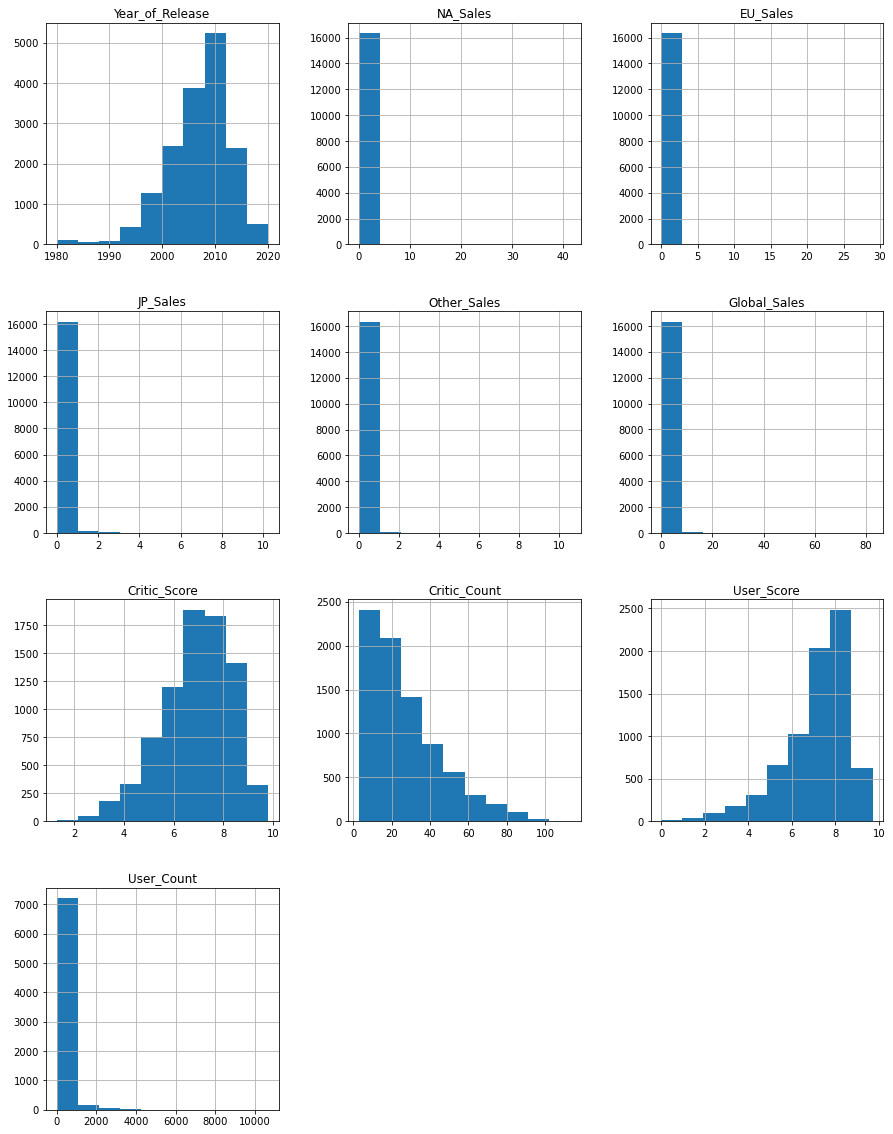

In [23]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

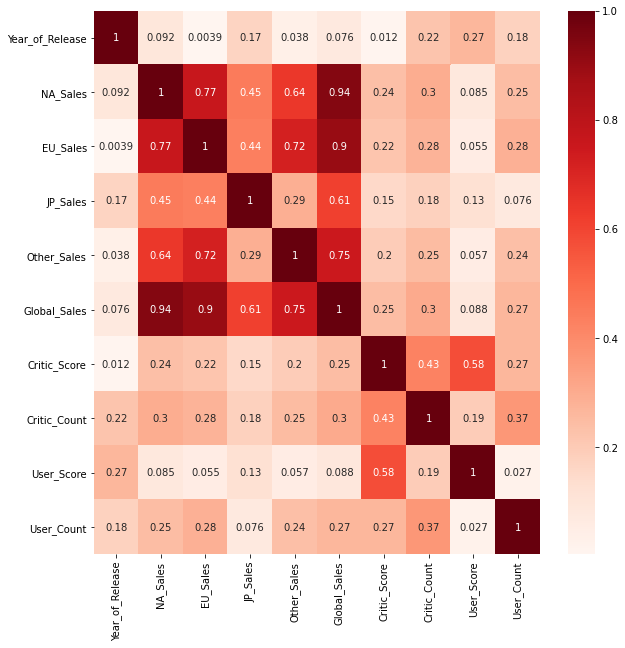

In [24]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='Reds', annot=True);

count    16416.000000
mean      2006.489888
std          5.881148
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year_of_Release, dtype: float64


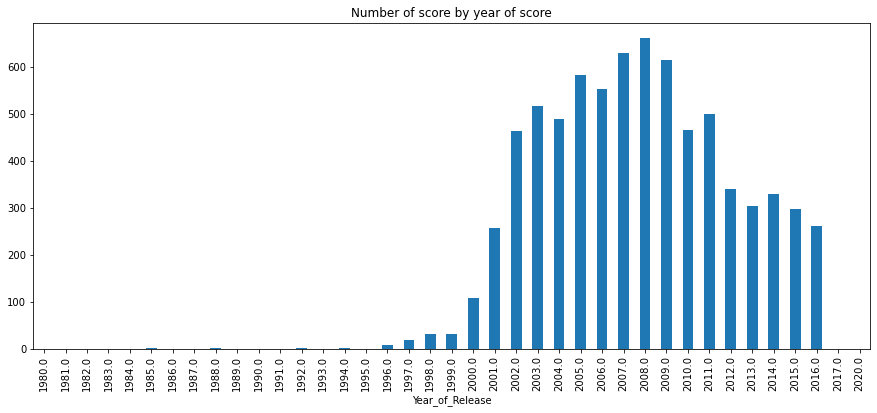

In [25]:
print(df['Year_of_Release'].describe()) 

# Number rating by rating year
df.groupby('Year_of_Release').count().User_Score.plot(kind='bar', figsize=(15,6))
plt.title('Number of score by year of score');

AxesSubplot(0.125,0.125;0.775x0.755)


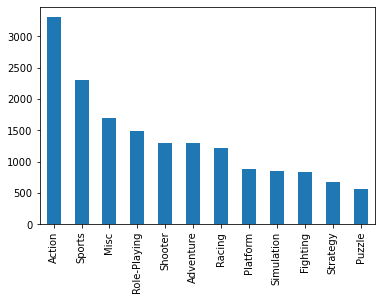

In [26]:
print(df['Genre'].value_counts().plot(kind='bar'))

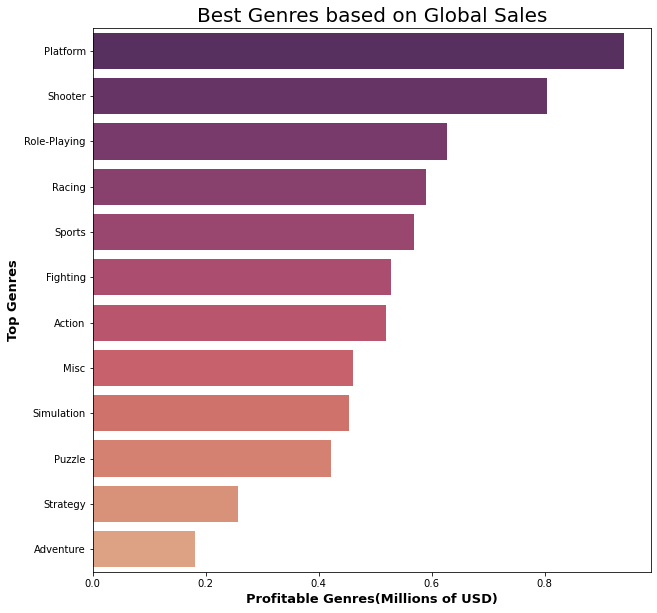

In [27]:
#Create plot to visualize the gathered data
fig, ax = plt.subplots(figsize=(10, 10))

#Group by box office, calculate sum of box office and sort by box office
aggregation_functions1 = {'Global_Sales': 'mean'}
df1 = df.groupby(df['Genre']).aggregate(aggregation_functions1).reset_index()
df1.sort_values('Global_Sales', inplace = True, 
               ascending = False, ignore_index = True)

#Plot using box office and rating 
sns.barplot(x = "Global_Sales", y = "Genre", 
              data = df1, palette = 'flare_r', ci = None)

#Setting title and labels
ax.set_xlabel('Profitable Genres(Millions of USD)', fontsize = 13, weight = 'bold')
ax.set_ylabel('Top Genres', fontsize = 13, weight = 'bold')
ax.set_title('Best Genres based on Global Sales', fontsize = 20);

In [28]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53           7.6   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52           8.2   
3     15.61     10.93      3.28         2.95         32.77           8.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count  
0          51.0         8.0       322.0  
1           NaN         NaN         NaN  
2          73.0         8.3       709.0  
3          73.0         8.0       192.0  
4           NaN         NaN         NaN

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       7461 non-null   float64
 13  User_Count       7461 non-null   float64
dtypes: float64(10), object(4)
memory usage: 1.9+ MB


In [30]:
#top_rated_games = df.loc[df['remaster'] == 1]
#top_rated_games.sort_values('Global_Sales',ascending = False).head(10)

In [31]:
# bin scores

In [32]:
df.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   
5  Nintendo     23.20      2.26      4.22         0.58         30.26   
6  Nintendo     11.28      9.14      6.50         2.88         29.80   
7  Nintendo     13.96      9.18      2.93         2.84         28.92   
8  Nintendo     14.44      6.94      4.70         2.24         28.32   
9  Nintendo     26.93      0.63      0.28         0.47         28.31   

   Critic_Score  Critic_Count  User_Score  User_Count  
0           7.6          51.0         8.0       322.0  
1           NaN           NaN         NaN         NaN  
2           8.2          73.0         8.3       709.0  
3           8.0          73.0         8.0       192.0  
4           NaN           NaN         NaN         NaN  
5           NaN           NaN         NaN         NaN  
6           8.9          65.0         8.5       431.0  
7           5.8          41.0         6.6       129.0  
8           8.7          80.0         8.4       594.0  
9           NaN           NaN         NaN         NaN

 ## Dropping Wii Games

In [33]:
df =df.drop(0)

In [34]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   
5                    Tetris       GB           1989.0        Puzzle  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52           8.2   
3     15.61     10.93      3.28         2.95         32.77           8.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   
5     23.20      2.26      4.22         0.58         30.26           NaN   

   Critic_Count  User_Score  User_Count  
1           NaN         NaN         NaN  
2          73.0         8.3       709.0  
3          73.0         8.0       192.0  
4           NaN         NaN         NaN  
5           NaN         NaN         NaN

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 1 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16415 non-null  object 
 1   Platform         16415 non-null  object 
 2   Year_of_Release  16415 non-null  float64
 3   Genre            16415 non-null  object 
 4   Publisher        16415 non-null  object 
 5   NA_Sales         16415 non-null  float64
 6   EU_Sales         16415 non-null  float64
 7   JP_Sales         16415 non-null  float64
 8   Other_Sales      16415 non-null  float64
 9   Global_Sales     16415 non-null  float64
 10  Critic_Score     7981 non-null   float64
 11  Critic_Count     7981 non-null   float64
 12  User_Score       7460 non-null   float64
 13  User_Count       7460 non-null   float64
dtypes: float64(10), object(4)
memory usage: 1.9+ MB


In [36]:
df['Global_Sales'].max()

40.24

In [37]:
df['Critic_Score'].fillna((df['Critic_Score'].mean()), inplace=True)
df['Critic_Count'].fillna((df['Critic_Count'].mean()), inplace=True)
df['User_Score'].fillna((df['User_Score'].mean()), inplace=True)
df['User_Count'].fillna((df['User_Count'].mean()), inplace=True)

 ## Bin Sales and User Score 

In [38]:
bins = [ 0,3,7,9.7]
labels =['low','average','high']
df['Score_Bin'] = pd.cut(df['User_Score'], bins,labels=labels)


df['Score_Bin'].value_counts()

high       13555
average     2698
low          161
Name: Score_Bin, dtype: int64

In [39]:
# Binning Global sales

In [40]:
min_value = df['Global_Sales'].min()
max_value = df['Global_Sales'].max()
print(min_value)
print(max_value)

0.01
40.24


In [41]:
binz = [ 0,13,26,40.24 ]
binz

[0, 13, 26, 40.24]

In [42]:
labelz = ['Low','Average','Large']

In [43]:
df['bins_sales'] = pd.cut(df['Global_Sales'], bins=binz, labels=labelz)

In [44]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   
5                    Tetris       GB           1989.0        Puzzle  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
1     29.08      3.58      6.81         0.77         40.24      6.899624   
2     15.68     12.76      3.79         3.29         35.52      8.200000   
3     15.61     10.93      3.28         2.95         32.77      8.000000   
4     11.27      8.89     10.22         1.00         31.37      6.899624   
5     23.20      2.26      4.22         0.58         30.26      6.899624   

   Critic_Count  User_Score  User_Count Score_Bin bins_sales  
1     26.437915    7.126783  162.987534      high      Large  
2     73.000000    8.300000  709.000000      high      Large  
3     73.000000    8.000000  192.000000      high      Large  
4     26.437915    7.126783  162.987534      high      Large  
5     26.437915    7.126783  162.987534      high      Large

In [45]:
df['bins_sales'].value_counts()

Low        16377
Average       29
Large          9
Name: bins_sales, dtype: int64

In [46]:
top_rated_games = df.loc[df['Score_Bin'] == 'high']
top_rated_games.sort_values('Global_Sales',ascending = False).head(20)

Name Platform  Year_of_Release  \
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS           2005.0   
12                   Pokemon Gold/Pokemon Silver       GB           1999.0   
13                                       Wii Fit      Wii           2007.0   
15                                  Wii Fit Plus      Wii           2009.0   
16                            Grand Theft Auto V      PS3           2013.0   
17                 Grand Theft Auto: San Andreas      PS2           2004.0   
18                             Super Mario World     SNES           1990.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   
20                 Pokemon Diamond/Pokemon Pearl       DS           2006.0   
21                              Super Mario Land       GB           1989.0   
22                           Super Mario Bros. 3      NES           1988.0   

           Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
1       Platform              Nintendo     29.08      3.58      6.81   
2         Racing              Nintendo     15.68     12.76      3.79   
3         Sports              Nintendo     15.61     10.93      3.28   
4   Role-Playing              Nintendo     11.27      8.89     10.22   
5         Puzzle              Nintendo     23.20      2.26      4.22   
6       Platform              Nintendo     11.28      9.14      6.50   
8       Platform              Nintendo     14.44      6.94      4.70   
9        Shooter              Nintendo     26.93      0.63      0.28   
10    Simulation              Nintendo      9.05     10.95      1.93   
11        Racing              Nintendo      9.71      7.47      4.13   
12  Role-Playing              Nintendo      9.00      6.18      7.20   
13        Sports              Nintendo      8.92      8.03      3.60   
15        Sports              Nintendo      9.01      8.49      2.53   
16        Action  Take-Two Interactive      7.02      9.09      0.98   
17        Action  Take-Two Interactive      9.43      0.40      0.41   
18      Platform              Nintendo     12.78      3.75      3.54   
19          Misc              Nintendo      4.74      9.20      4.16   
20  Role-Playing              Nintendo      6.38      4.46      6.04   
21      Platform              Nintendo     10.83      2.71      4.18   
22      Platform              Nintendo      9.54      3.44      3.84   

    Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
1          0.77         40.24      6.899624     26.437915    7.126783   
2          3.29         35.52      8.200000     73.000000    8.300000   
3          2.95         32.77      8.000000     73.000000    8.000000   
4          1.00         31.37      6.899624     26.437915    7.126783   
5          0.58         30.26      6.899624     26.437915    7.126783   
6          2.88         29.80      8.900000     65.000000    8.500000   
8          2.24         28.32      8.700000     80.000000    8.400000   
9          0.47         28.31      6.899624     26.437915    7.126783   
10         2.74         24.67      6.899624     26.437915    7.126783   
11         1.90         23.21      9.100000     64.000000    8.600000   
12         0.71         23.10      6.899624     26.437915    7.126783   
13         2.15 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 1 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16415 non-null  object  
 1   Platform         16415 non-null  object  
 2   Year_of_Release  16415 non-null  float64 
 3   Genre            16415 non-null  object  
 4   Publisher        16415 non-null  object  
 5   NA_Sales         16415 non-null  float64 
 6   EU_Sales         16415 non-null  float64 
 7   JP_Sales         16415 non-null  float64 
 8   Other_Sales      16415 non-null  float64 
 9   Global_Sales     16415 non-null  float64 
 10  Critic_Score     16415 non-null  float64 
 11  Critic_Count     16415 non-null  float64 
 12  User_Score       16415 non-null  float64 
 13  User_Count       16415 non-null  float64 
 14  Score_Bin        16414 non-null  category
 15  bins_sales       16415 non-null  category
dtypes: category(2), float64(10), object(4)
m

<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-da6f0d32d362>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


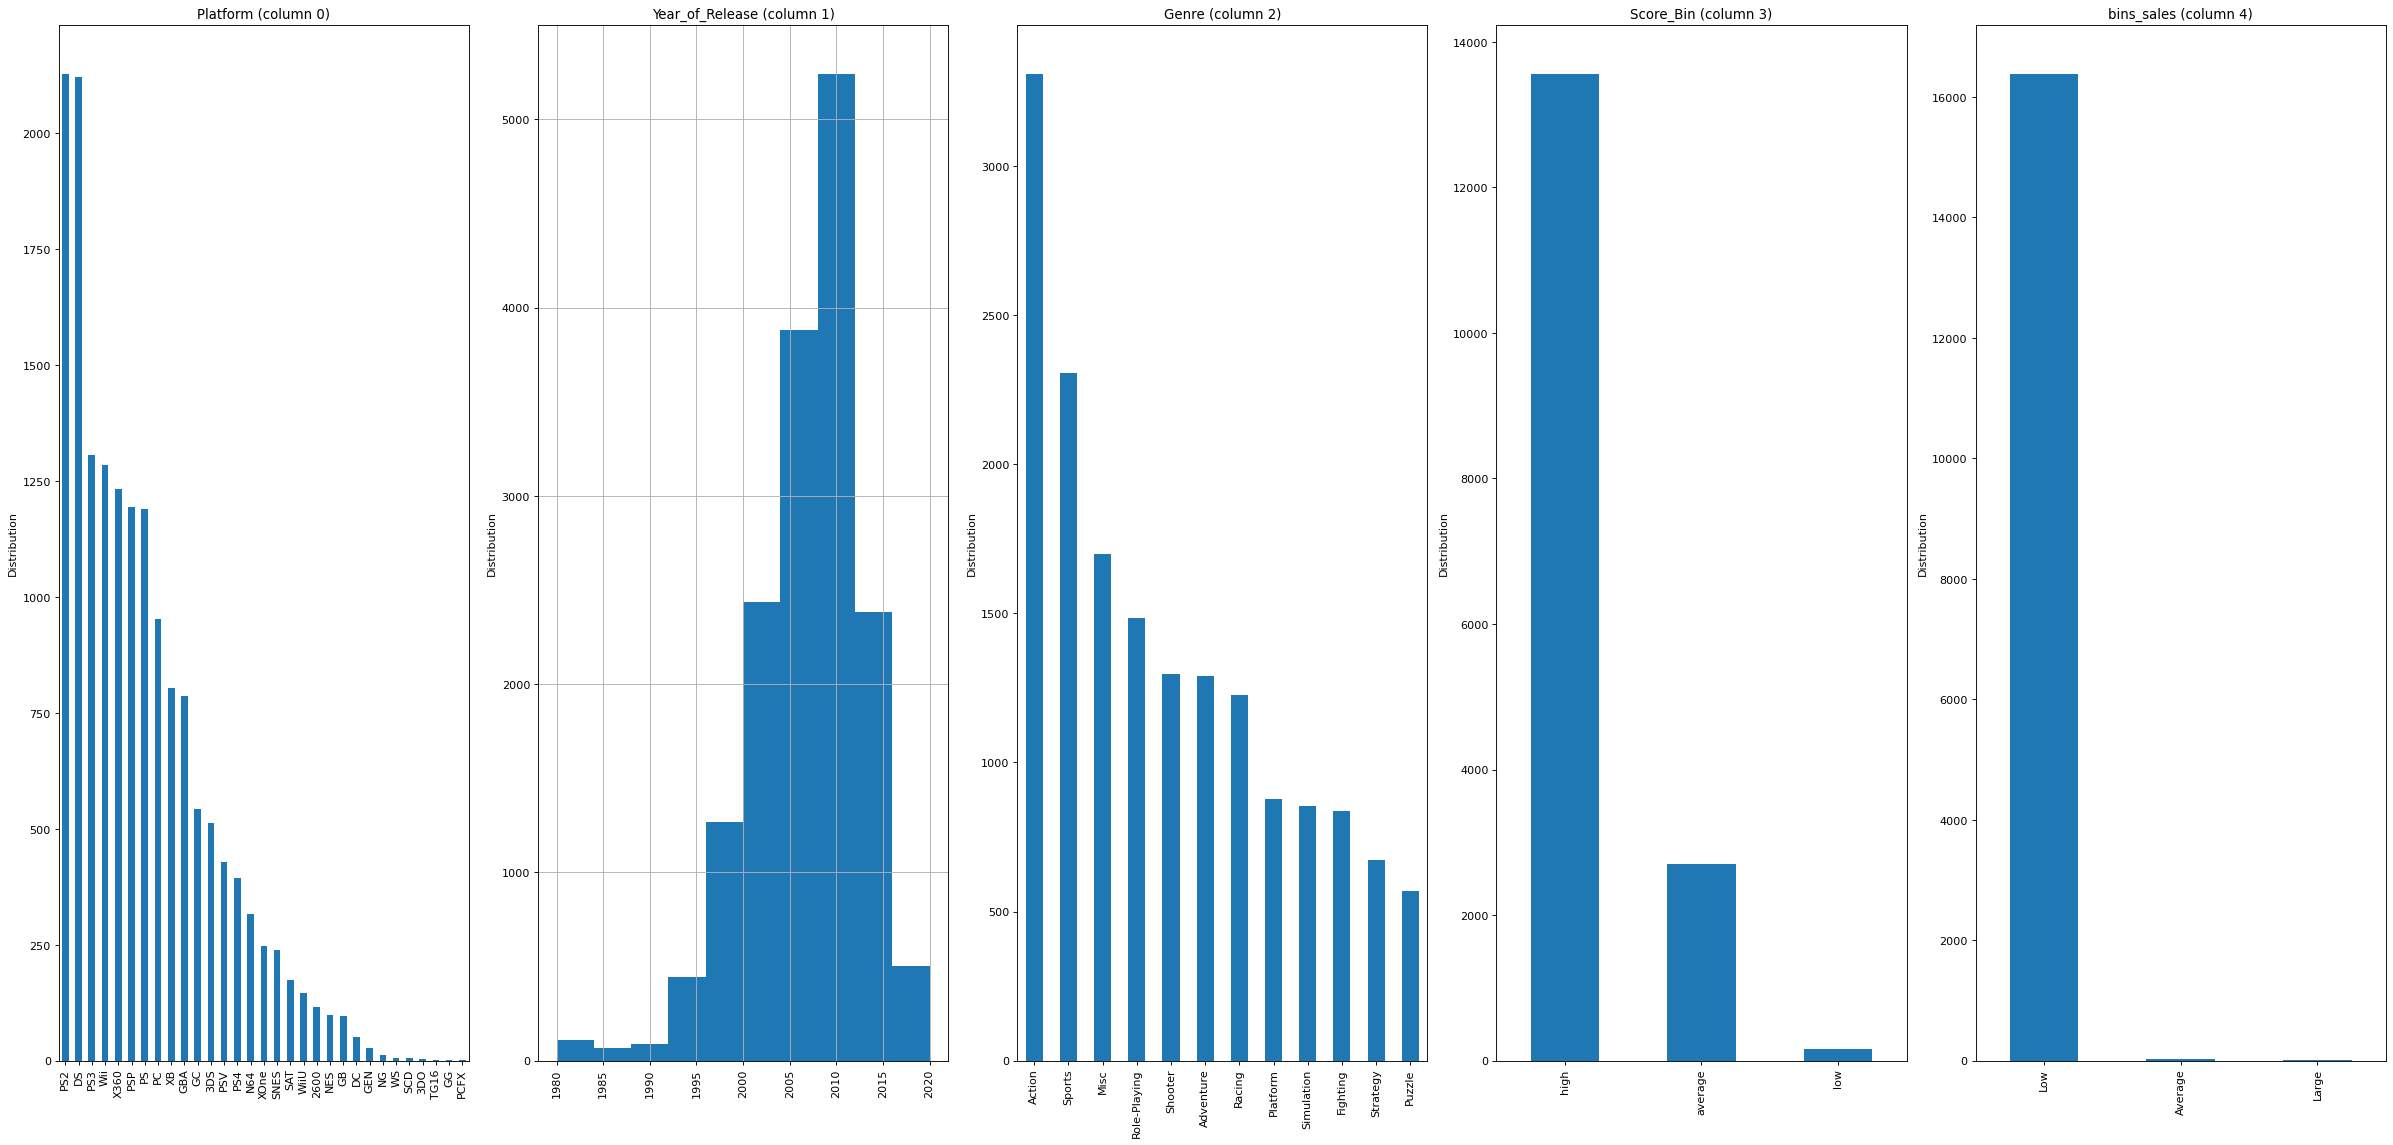

In [48]:
plotPerColumnDistribution(df, 10, 5)

In [49]:
#df['Critic_Score'].fillna((df['Critic_Score'].mean()), inplace=True)
#df['Critic_Count'].fillna((df['Critic_Count'].mean()), inplace=True)
#df['User_Score'].fillna((df['User_Score'].mean()), inplace=True)
#df['User_Count'].fillna((df['User_Count'].mean()), inplace=True)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 1 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16415 non-null  object  
 1   Platform         16415 non-null  object  
 2   Year_of_Release  16415 non-null  float64 
 3   Genre            16415 non-null  object  
 4   Publisher        16415 non-null  object  
 5   NA_Sales         16415 non-null  float64 
 6   EU_Sales         16415 non-null  float64 
 7   JP_Sales         16415 non-null  float64 
 8   Other_Sales      16415 non-null  float64 
 9   Global_Sales     16415 non-null  float64 
 10  Critic_Score     16415 non-null  float64 
 11  Critic_Count     16415 non-null  float64 
 12  User_Score       16415 non-null  float64 
 13  User_Count       16415 non-null  float64 
 14  Score_Bin        16414 non-null  category
 15  bins_sales       16415 non-null  category
dtypes: category(2), float64(10), object(4)
m

In [51]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   
5                    Tetris       GB           1989.0        Puzzle  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
1     29.08      3.58      6.81         0.77         40.24      6.899624   
2     15.68     12.76      3.79         3.29         35.52      8.200000   
3     15.61     10.93      3.28         2.95         32.77      8.000000   
4     11.27      8.89     10.22         1.00         31.37      6.899624   
5     23.20      2.26      4.22         0.58         30.26      6.899624   

   Critic_Count  User_Score  User_Count Score_Bin bins_sales  
1     26.437915    7.126783  162.987534      high      Large  
2     73.000000    8.300000  709.000000      high      Large  
3     73.000000    8.000000  192.000000      high      Large  
4     26.437915    7.126783  162.987534      high      Large  
5     26.437915    7.126783  162.987534      high      Large

In [52]:
df = df.dropna()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16414 entries, 1 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16414 non-null  object  
 1   Platform         16414 non-null  object  
 2   Year_of_Release  16414 non-null  float64 
 3   Genre            16414 non-null  object  
 4   Publisher        16414 non-null  object  
 5   NA_Sales         16414 non-null  float64 
 6   EU_Sales         16414 non-null  float64 
 7   JP_Sales         16414 non-null  float64 
 8   Other_Sales      16414 non-null  float64 
 9   Global_Sales     16414 non-null  float64 
 10  Critic_Score     16414 non-null  float64 
 11  Critic_Count     16414 non-null  float64 
 12  User_Score       16414 non-null  float64 
 13  User_Count       16414 non-null  float64 
 14  Score_Bin        16414 non-null  category
 15  bins_sales       16414 non-null  category
dtypes: category(2), float64(10), object(4)
m

# Pre-Processing


##  TRAIN TEST SPLIT

In [54]:
X = df.drop(['bins_sales','Publisher','Name'], axis=1)
y = df.bins_sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15) 

#Scale data
#scale = StandardScaler()
#x_train_scaled = scale.fit_transform(x_train)
#x_test_scaled = scale.transform(x_test)



## ONE HOT ENCODE

In [55]:
def OHE(X_train, categories):
    onehot = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
    x_train_cat = pd.DataFrame(onehot.fit_transform(X_train[categories]))
    x_train_cat.columns = onehot.get_feature_names(categories)
    # Reset indices to avoid merging conflicts
    x_train_cat.reset_index(drop=True, inplace=True)
    X_train.reset_index(drop=True, inplace=True)
    # Joined the OHE dataframe to the dataframe that is passed into the function
    x_train_df = X_train.drop(categories, axis = 1).join(x_train_cat)
    return x_train_df

In [56]:
X_train_encode = OHE(X_train,['Genre', 'Platform','Score_Bin'])
X_test_encode = OHE(X_test,['Genre', 'Platform','Score_Bin'])

In [57]:
X_train_encode

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0               2001.0      0.62      0.49      0.00         0.16   
1               2016.0      0.00      0.02      0.00         0.00   
2               2006.0      0.13      0.05      0.00         0.01   
3               2008.0      0.00      0.00      0.03         0.00   
4               2003.0      0.07      0.03      0.00         0.00   
...                ...       ...       ...       ...          ...   
12305           2009.0      0.20      0.02      0.00         0.03   
12306           2014.0      0.00      0.01      0.00         0.00   
12307           2009.0      0.66      0.04      0.00         0.05   
12308           2011.0      0.06      0.08      0.00         0.03   
12309           2012.0      0.00      0.00      0.19         0.00   

       Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  ...  \
0              1.28      8.900000     34.000000    8.900000  557.000000  ...   
1              0.03      6.899624     26.437915    7.126783  162.987534  ...   
2              0.19      8.100000     21.000000    6.800000    6.000000  ...   
3              0.03      6.899624     26.437915    7.126783  162.987534  ...   
4              0.10      7.800000     15.000000    9.300000   23.000000  ...   
...             ...           ...           ...         ...         ...  ...   
12305          0.25      6.899624     26.437915    7.126783  162.987534  ...   
12306          0.01      6.899624     26.437915    7.500000    4.000000  ...   
12307          0.75      6.899624     26.437915    7.126783  162.987534  ...   
12308          0.17      6.899624     26.437915    7.126783  162.987534  ...   
12309          0.19      6.899624     26.437915    7.126783  162.987534  ...   

       Platform_TG16  Platform_WS  Platform_Wii  Platform_WiiU  Platform_X360  \
0                0.0          0.0           0.0            0.0            0.0   
1                0.0          0.0           0.0            0.0            0.0   
2                0.0          0.0           0.0            0.0            0.0   
3                0.0          0.0           0.0            0.0            0.0   
4                0.0          0.0           0.0            0.0            0.0   
...              ...          ...           ...            ...            ...   
12305            0.0          0.0           0.0            0.0            0.0   
12306            0.0          0.0           0.0            0.0            0.0   
12307            0.0          0.0           1.0            0.0            0.0   
12308            0.0          0.0           0.0            0.0            0.0   
12309            0.0          0.0           0.0            0.0            0.0   

       Platform_XB  Platform_XOne  Score_Bin_average  Score_Bin_high  \
0              0.0            0.0                0.0             1.0   
1              0.0            0.0                0.0             1.0   
2              1.0            0.0                1.0             0.0   
3              0.0            0.0                0.0             1.0   
4              0.0            0.0                0.0             1.0   
...            ...            ...                ...             ...   
12305          0.0            0.0                0.0             1.0   
12306          0.0            0.0                0.0             1.0   
12307          0.0            0.0                0.0             1.0   
12308          0.0            0.0                0.0             1.0   
12309          0.0            0.0                0.0             1.0   

       Score_Bin_low  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
12305            0.0  
12306            0.0  
12307            0.0  
12308            0.0  
12309            0.0  

[12310 rows x 54 columns]

In [58]:
X_test_encode = OHE(X_test,['Genre', 'Platform','Score_Bin'])

In [59]:
X_test_encode


Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0              2001.0      1.70      0.59      0.21         0.07   
1              2007.0      0.00      0.00      0.02         0.00   
2              1996.0      0.26      0.07      1.09         0.02   
3              2011.0      0.13      0.01      0.00         0.01   
4              2009.0      0.35      0.12      0.00         0.04   
...               ...       ...       ...       ...          ...   
4099           2007.0      0.13      0.10      0.00         0.03   
4100           2007.0      0.22      0.01      0.00         0.02   
4101           2016.0      0.06      0.07      0.01         0.01   
4102           2006.0      0.62      0.02      0.00         0.10   
4103           2009.0      0.09      0.01      0.00         0.01   

      Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  ...  \
0             2.56      7.300000     28.000000    8.300000  179.000000  ...   
1             0.02      6.899624     26.437915    7.126783  162.987534  ...   
2             1.44      6.899624     26.437915    7.126783  162.987534  ...   
3             0.15      6.899624     26.437915    7.126783  162.987534  ...   
4             0.51      6.899624     26.437915    6.200000    6.000000  ...   
...            ...           ...           ...         ...         ...  ...   
4099          0.26      6.899624     26.437915    7.126783  162.987534  ...   
4100          0.25      8.500000     44.000000    8.200000   44.000000  ...   
4101          0.15      7.400000      6.000000    8.000000   11.000000  ...   
4102          0.75      7.600000     27.000000    9.000000   18.000000  ...   
4103          0.10      6.100000      9.000000    7.800000    6.000000  ...   

      Platform_SCD  Platform_SNES  Platform_Wii  Platform_WiiU  Platform_X360  \
0              0.0            0.0           0.0            0.0            0.0   
1              0.0            0.0           0.0            0.0            0.0   
2              0.0            1.0           0.0            0.0            0.0   
3              0.0            0.0           0.0            0.0            0.0   
4              0.0            0.0           0.0            0.0            0.0   
...            ...            ...           ...            ...            ...   
4099           0.0            0.0           0.0            0.0            0.0   
4100           0.0            0.0           0.0            0.0            1.0   
4101           0.0            0.0           0.0            1.0            0.0   
4102           0.0            0.0           0.0            0.0            0.0   
4103           0.0            0.0           0.0            0.0            0.0   

      Platform_XB  Platform_XOne  Score_Bin_average  Score_Bin_high  \
0             0.0            0.0                0.0             1.0   
1             0.0            0.0                0.0             1.0   
2             0.0            0.0                0.0             1.0   
3             0.0            0.0                0.0             1.0   
4             0.0            0.0                1.0             0.0   
...           ...            ...                ...             ...   
4099          0.0            0.0                0.0             1.0   
4100          0.0            0.0                0.0             1.0   
4101          0.0            0.0                0.0             1.0   
4102          0.0            0.0                0.0             1.0   
4103          0.0            0.0                0.0             1.0   

      Score_Bin_low  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
4099            0.0  
4100            0.0  
4101            0.0  
4102            0.0  
4103            0.0  

[4104 rows x 53 columns]

## SCALE OR SMOTE

In [60]:
y_train.value_counts()

Low        12282
Average       19
Large          9
Name: bins_sales, dtype: int64

In [62]:
sm = SMOTE(random_state=15)
X_train,y_train = sm.fit(X_train_encode,y_train)

TypeError: cannot unpack non-iterable SMOTE object

In [ ]:
#Dummy Model

In [ ]:
from sklearn.metrics import f1_score
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(x_train, y_train)
y_hat_train = dummy_model.predict(x_train)
y_hat_test = dummy_model.predict(x_test)
f1_score(y_train, y_hat_train, average= 'micro')
#f1_score(y_test, y_hat_test, average= 'micro')

In [ ]:
f1_score(y_test, y_hat_test, average= 'macro')

In [ ]:
y_train.value_counts()

# BASELINE MODEL

# NEXT STEPS / APPENDIX


In [ ]:
#Identifying sequl Games
#df['remaster']=np.where((df['User_Score']>=78) & (df['Year_of_Release']<=2013),1,0)
#df['remaster'].value_counts()
# setting conditions for remaster criteria
#conditions = [
    #df['User_Score'] >= 7.8,
    #df['Year_of_Release'] <2013,
#]

#values =['1','1']

In [ ]:
#Creating a Binary column for remaster. When considering what games to remaster. we want to include games that:
#- Have great User Scores, So the cutoff will be the mode 7.8. User scores are more imoortant than critic scores in this case beacuse some older games may not have critic scores and we wnat games that users themseveles enjoyed.
#- And we want to remaster older games that ahve not been out and available for the newest generation. SO the cutoff will be the year the Xbox One launched 2013